In [1]:
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
jobs_of_interest = [str(x) for x in [19366265, 19366264]]
jobs_of_interest

['19366265', '19366264']

In [3]:
log_files = ['output/' + x for x in os.listdir('output/') if x.split('_')[0] in jobs_of_interest]
log_files

['output/19366265_output_f_15000_clients_2.log',
 'output/19366264_output_f_10000_clients_2.log']

In [4]:
def extract_eval_acc(file_path):
    # Regex to find eval_acc values
    pattern = r"eval_acc=(\d+\.\d+)"
    
    # Open file and read contents
    with open(file_path, 'r') as file:
        log_text = file.read()
    
    # Find all matches in the log text
    matches = re.findall(pattern, log_text)
    
    # Convert matches to float, skipping the first occurrence
    eval_acc_values = [float(acc) for acc in matches[1:]] if len(matches) > 1 else []
    
    return eval_acc_values

x = extract_eval_acc('output/19366182_output_f_8000_clients_2.log')
len(x), max(x), min(x)

(9999, 0.742, 0.101)

In [5]:
accuracies = {}
for log_file in log_files:
    key = 'q=' + log_file.split('_')[3]
    values = extract_eval_acc(log_file)
    accuracies[key] = values

In [6]:
df = pd.DataFrame.from_dict(accuracies, orient='index').transpose()
df.dropna(inplace=True)
df

,q=15000,q=10000
0,0.115,0.104
1,0.115,0.114
2,0.115,0.114
3,0.116,0.113
4,0.116,0.113
...,...,...
18594,0.771,0.760
18595,0.770,0.762
18596,0.770,0.762
18597,0.767,0.757


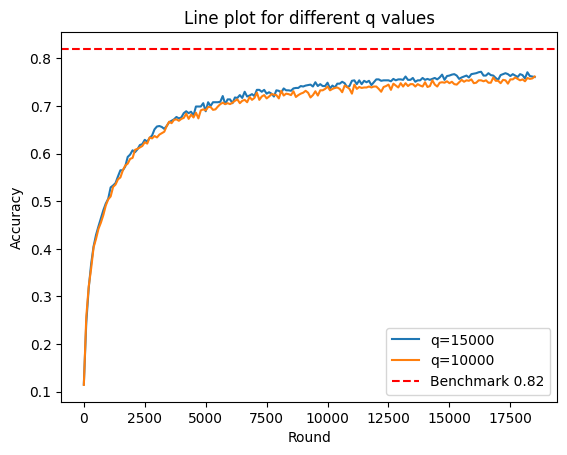

In [7]:
# Convert the DataFrame into long format
df_long = df.reset_index().melt(id_vars='index', var_name='q', value_name='value')

# Sample the DataFrame by every 100th row (use iloc to sample every 100th row)
df_long_sampled = df_long.iloc[::100, :]

# Create the line plot using seaborn
sns.lineplot(data=df_long_sampled, x='index', y='value', hue='q')

# Add a constant horizontal line at y = 0.82
plt.axhline(y=0.82, color='red', linestyle='--', label='Benchmark 0.82')

# Add labels and a title
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Line plot for different q values')

# Show the legend (to include the benchmark line)
plt.legend()


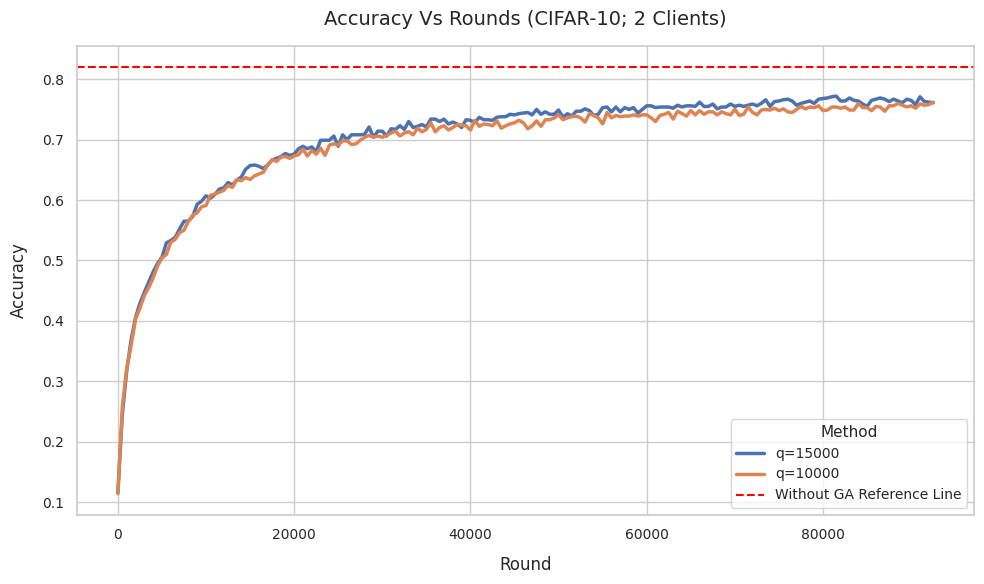

In [8]:
# Convert the DataFrame into long format
df_long = df.reset_index().melt(id_vars='index', var_name='q', value_name='value')

# Multiply the 'index' values by 10 to represent 'Rounds'
df_long['index'] = df_long['index'] * 5

# Sample the DataFrame by every 100th row
df_long_sampled = df_long.iloc[::100, :]

# Set the plot style to make it visually appealing
sns.set(style='whitegrid')  # Adds a clean grid background

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size for better presentation
sns.lineplot(data=df_long_sampled, x='index', y='value', hue='q', linewidth=2.5)

# Add a constant horizontal line at y = 0.82
plt.axhline(y=0.82, color='red', linestyle='--', linewidth=1.5, label='Without GA Reference Line')

# Add labels and a title
plt.xlabel('Round', fontsize=12, labelpad=10)
plt.ylabel('Accuracy', fontsize=12, labelpad=10)
plt.title('Accuracy Vs Rounds (CIFAR-10; 2 Clients)', fontsize=14, pad=15)

# Customize the ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend
plt.legend(title='Method', fontsize=10, title_fontsize=11, loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
accuracies.keys()

dict_keys(['q=15000', 'q=10000'])

In [10]:
max(accuracies['q=15000']), max(accuracies['q=10000'])

(0.777, 0.77)